In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
# Conexión a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Dividir conjunto de datos
# Crear generadores para entrenamiento, validación y prueba
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% de los datos para validación
)

# Conjunto de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4827 images belonging to 10 classes.
Found 1201 images belonging to 10 classes.


In [13]:
#Arquitectura 1: CNN básica
from tensorflow.keras import layers, models

# Arquitectura CNN 1: básica
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar el modelo
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history1 = model1.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.2323 - loss: 2.2057 - val_accuracy: 0.3480 - val_loss: 1.8701
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.5398 - loss: 1.3281 - val_accuracy: 0.5537 - val_loss: 1.3308
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.7170 - loss: 0.8690 - val_accuracy: 0.6570 - val_loss: 1.0655
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.7705 - loss: 0.6824 - val_accuracy: 0.6803 - val_loss: 0.9664
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.8275 - loss: 0.5127 - val_accuracy: 0.6811 - val_loss: 0.9386
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.8328 - loss: 0.5011 - val_accuracy: 0.7777 - val_loss: 0.6816
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.8660 - loss: 0.3927 - val_accuracy: 0.7827 - val_loss: 0.6138
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.8822 - loss: 0.3567 - val_accu

In [14]:
# Arquitectura 2: CNN con más capas convolucionales
# Arquitectura CNN 2: más capas
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar y entrenar
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history2 = model2.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.1778 - loss: 2.1880 - val_accuracy: 0.3322 - val_loss: 2.0858
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.5131 - loss: 1.3635 - val_accuracy: 0.5495 - val_loss: 1.2713
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.6550 - loss: 0.9890 - val_accuracy: 0.6162 - val_loss: 1.2186
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.7687 - loss: 0.6960 - val_accuracy: 0.6536 - val_loss: 0.9773
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.7933 - loss: 0.5956 - val_accuracy: 0.6761 - val_loss: 0.9209


In [15]:
# Arquitectura 3: CNN con dropout
# Arquitectura CNN 3: con dropout
model3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout para evitar sobreajuste
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compilar y entrenar
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history3 = model3.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.1735 - loss: 2.1881 - val_accuracy: 0.2565 - val_loss: 1.9366
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.4220 - loss: 1.6113 - val_accuracy: 0.4688 - val_loss: 1.5704
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 349s 2s/step - accuracy: 0.6013 - loss: 1.1768 - val_accuracy: 0.5396 - val_loss: 1.2584
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.6392 - loss: 1.0204 - val_accuracy: 0.6045 - val_loss: 1.2168
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.6994 - loss: 0.8950 - val_accuracy: 0.6470 - val_loss: 1.0281


In [16]:
# Evaluar los modelos
# Evaluar en el conjunto de validación
val_loss1, val_acc1 = model1.evaluate(validation_generator)
val_loss2, val_acc2 = model2.evaluate(validation_generator)
val_loss3, val_acc3 = model3.evaluate(validation_generator)

print(f"Modelo 1: Accuracy en validación: {val_acc1}")
print(f"Modelo 2: Accuracy en validación: {val_acc2}")
print(f"Modelo 3: Accuracy en validación: {val_acc3}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 780ms/step - accuracy: 0.7919 - loss: 0.5891
38/38 ━━━━━━━━━━━━━━━━━━━━ 32s 827ms/step - accuracy: 0.6700 - loss: 0.9297
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 873ms/step - accuracy: 0.6396 - loss: 1.0526
Modelo 1: Accuracy en validación: 0.7976686358451843
Modelo 2: Accuracy en validación: 0.6777685284614563
Modelo 3: Accuracy en validación: 0.6402997374534607


In [ ]:
Modelo 2 es mejor debido a la mayor cantidad de capas convolucionales, que permiten extraer características más complejas de las imágenes.
Modelo 3 podría ser mejor si evitó el sobreajuste gracias al uso de dropout.

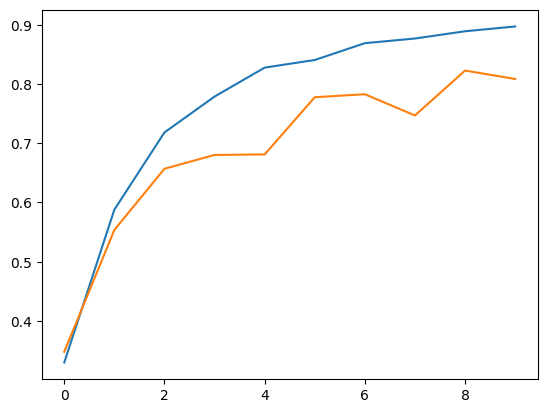

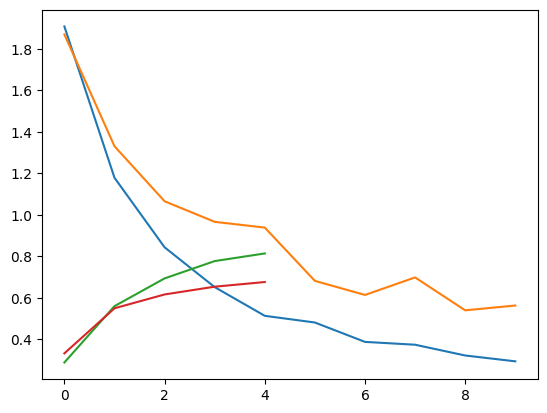

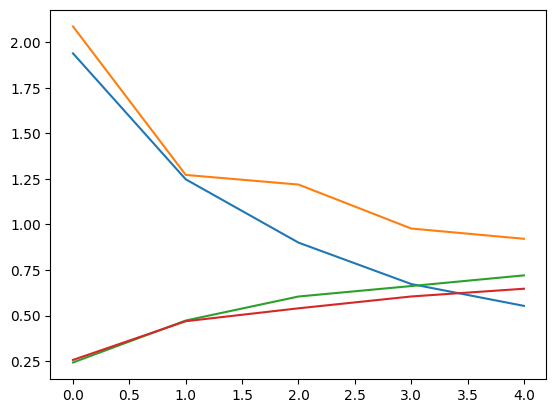

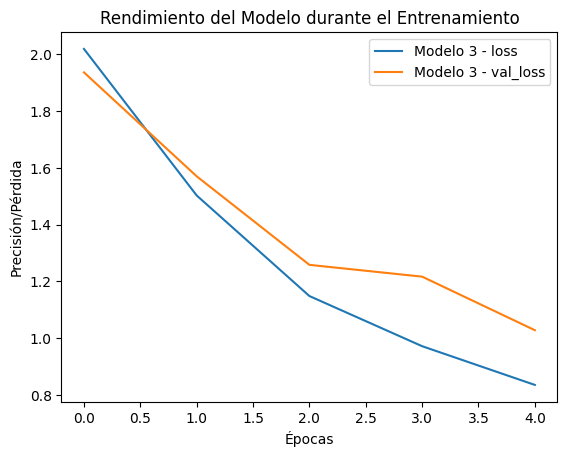

In [17]:
# Gráficar
import matplotlib.pyplot as plt

# Función para graficar el rendimiento del modelo
def plot_training_history(history, model_name):
    # Graficar precisión (accuracy)
    plt.plot(history.history['accuracy'], label=f'{model_name} - accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} - val_accuracy')

    # Graficar pérdida (loss)
    plt.figure()
    plt.plot(history.history['loss'], label=f'{model_name} - loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} - val_loss')

# Graficar resultados del Modelo 1
plot_training_history(history1, "Modelo 1")

# Graficar resultados del Modelo 2
plot_training_history(history2, "Modelo 2")

# Graficar resultados del Modelo 3
plot_training_history(history3, "Modelo 3")

# Mostrar leyenda y títulos
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Precisión/Pérdida')
plt.title('Rendimiento del Modelo durante el Entrenamiento')
plt.show()

In [ ]:
# Cargar imágenes
apple_image = load_img('/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits/FreshApple/freshApple (1).jpg', target_size=(150, 150))
mango_image = load_img('/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits/FreshMango/freshMango (1).png', target_size=(150, 150))

In [ ]:
# Convertir imágenes a arrays
apple_array = img_to_array(apple_image)
mango_array = img_to_array(mango_image)

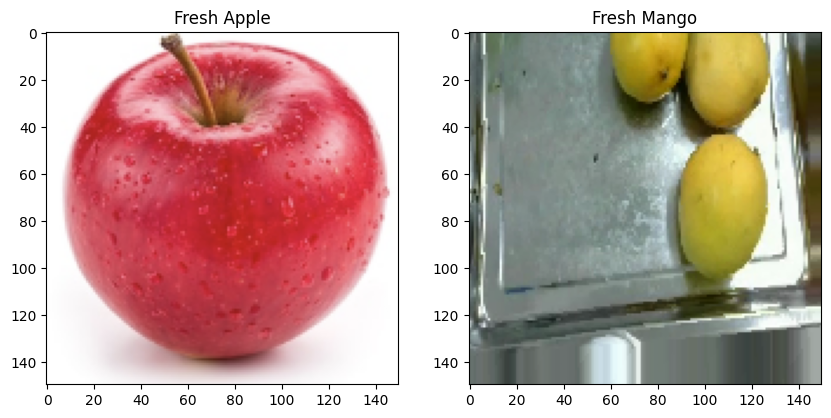

In [ ]:
# Normalizar los valores entre 0 y 1
apple_array /= 255.0
mango_array /= 255.0

# Mostrar las imágenes cargadas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(apple_array)
plt.title('Fresh Apple')

plt.subplot(1, 2, 2)
plt.imshow(mango_array)
plt.title('Fresh Mango')

plt.show()

In [ ]:
# Generador de datos con aumento para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Cargar imágenes
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Proyecto Final Text Mining & Image/P2 archive/Fruits_Vegetables_Dataset(12000)/Fruits',  # Carpeta con imágenes
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Múltiples clases
)

Found 6028 images belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers, models

# Red neuronal convolucional (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 clases: 5 frutas y 5 vegetales
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo con el generador de datos
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_steps=50
)

Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4447 - loss: 1.6011
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5895 - loss: 1.1634


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
print(train_generator.num_classes)

10
